# Covariance and Correlation

**Covariance** measures how two variables vary in tandem from their means.

For example, let's say we work for an e-commerce company, and they are interested in finding a correlation between page speed (how fast each web page renders for a customer) and how much a customer spends.

numpy offers covariance methods, but we'll do it the "hard way" first to show what happens under the hood. Basically we treat each variable as a vector of deviations from the mean, and compute the "dot product" of both vectors. Geometrically this can be thought of as the angle between the two vectors in a high-dimensional space, but you can just think of it as a measure of similarity between the two variables.

## Imports

In [1]:
%matplotlib inline
import numpy as np
from pylab import *

## Functions
Manual functions for covariance, mean, and correlation

In [2]:
def de_mean(x):
    xmean = mean(x)
    return [xi - xmean for xi in x]

def covariance(x, y):
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / (n-1)

def correlation(x, y):
    stddevx = x.std()
    stddevy = y.std()
    return covariance(x,y) / stddevx / stddevy  #In real life you'd check for divide by zero here

## Mock Page-Speed and Purchase Data

covarianceValue: -0.6195751402777202


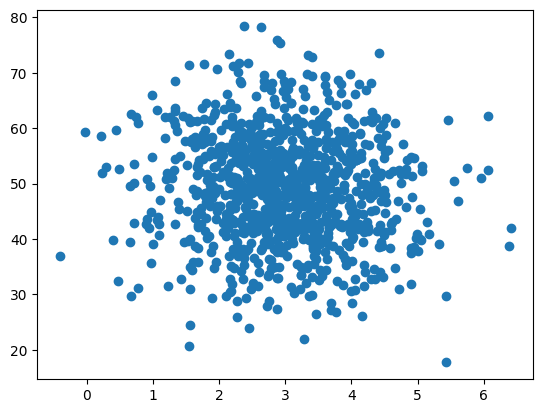

In [10]:
pageSpeeds = np.random.normal(3.0, 1.0, 1000)
purchaseAmount = np.random.normal(50.0, 10.0, 1000)

scatter(pageSpeeds, purchaseAmount)
covarianceValue = covariance (pageSpeeds, purchaseAmount)
print(f'covarianceValue: {covarianceValue}')

Now we'll make our fabricated purchase amounts an actual function of page speed, making a very real correlation.  
The negative value indicates an inverse relationship; pages that render in less time result in more money spent:

NEW covariance: -7.7704862592344695


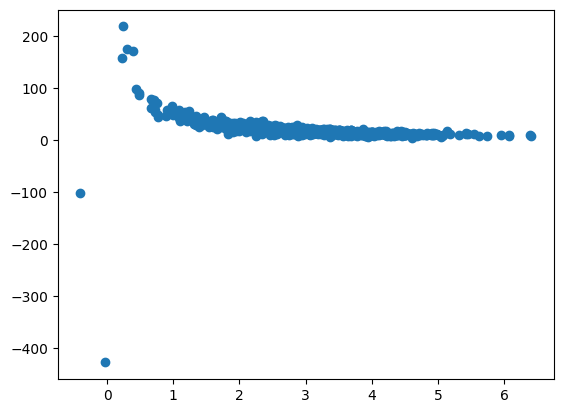

In [11]:
newPurchaseAmount = np.random.normal(50.0, 10.0, 1000) / pageSpeeds

scatter(pageSpeeds, newPurchaseAmount)

newCovariance = covariance(pageSpeeds, newPurchaseAmount)
print(f'NEW covariance:',newCovariance)

But, what does this value mean? Covariance is sensitive to the units used in the variables, which makes it difficult to interpret. Correlation normalizes everything by their standard deviations, giving you an easier to understand value that ranges from -1 (for a perfect inverse correlation) to 1 (for a perfect positive correlation):

In [12]:
correlation(pageSpeeds, newPurchaseAmount)

-0.37699733446863615

numpy can do all this for you with numpy.corrcoef. It returns a matrix of the correlation coefficients between every combination of the arrays passed in:

In [13]:
np.corrcoef(pageSpeeds, newPurchaseAmount)

array([[ 1.        , -0.37662034],
       [-0.37662034,  1.        ]])

(It doesn't match exactly just due to the math precision available on a computer.)

We can force a perfect correlation by fabricating a totally linear relationship (again, it's not exactly -1 just due to precision errors, but it's close enough to tell us there's a really good correlation here):

-1.0010010010010006

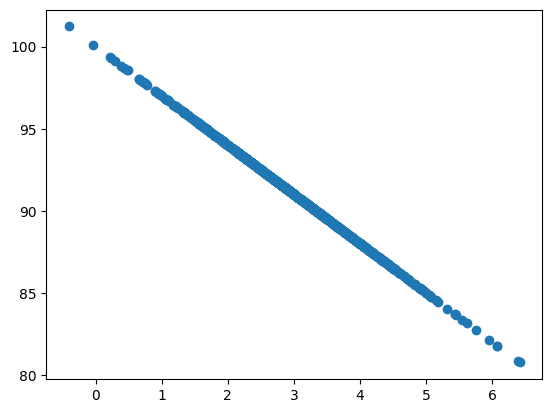

In [14]:
newestPurchaseAmount = 100 - pageSpeeds * 3

scatter(pageSpeeds, newestPurchaseAmount)

correlation(pageSpeeds, newestPurchaseAmount)

## Covariance with Numpy

In [17]:
npCov = np.cov(pageSpeeds, newPurchaseAmount)
print(f'npCovariance: {npCov}')

npCovariance: [[  0.99098805  -7.77048626]
 [ -7.77048626 429.55664346]]
